Some imports:

In [143]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import math

Please configure here how many bins should the Generic-CSP (G-CSP) have and what is the threshold for adding a bar in a CSP (barcode) to the G-CSP:

In [144]:
nbins = 20 # more bins = thinner bars
barthreshold = 5 # higher threshold = fewer bars

Creating some fake CSPs to illustrate the CSP (barcode) clustering mechanism. Feel free to play around with the signals.

In [145]:
listofcsps = []
listofcsps += [[40*(1+math.sin(i/10*math.pi)) for i in range(10)]]
listofcsps += [[40*(1+math.cos(i/50*math.pi)) for i in range(100)]]
listofcsps += [[10*(1+math.sin(i/20*math.pi)) for i in range(100)]]
listofcsps += [[5*(1+math.sin(i/10*math.pi)) for i in range(50)]]

Configuration settings for the figures created below (you can ignore this):

In [146]:
figsize = (7, 3)
cmap = plt.get_cmap('rainbow')
colors = [cmap(1/(len(listofcsps)-1)*i) for i in range(len(listofcsps))]
decforyaxis = StrMethodFormatter('{x:,.1f}')
allmortonindices = []
for csp in listofcsps:
    allmortonindices += csp
mortonindexmin = min(allmortonindices)
mortonindexmax = max(allmortonindices)
totalrange = mortonindexmax - mortonindexmin
margins = totalrange/50.0

Plotting the generated CSPs together:

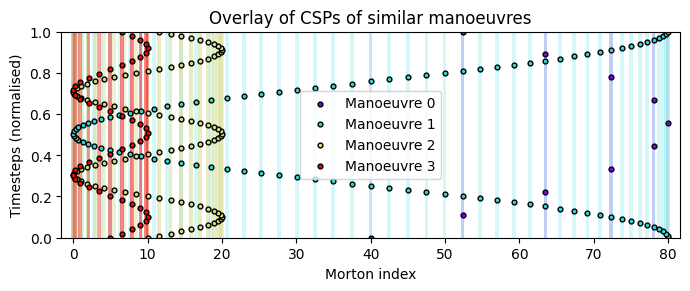

In [147]:
plt.figure(figsize=figsize)
for i, csp in enumerate(listofcsps):
    ranges = [x/(len(csp)-1) for x in range(len(csp))]
    plt.bar(csp, [1 for _ in range(len(csp))], width=0.5, color=colors[i], alpha=0.1)
for i, csp in enumerate(listofcsps):
    ranges = [x / (len(csp) - 1) for x in range(len(csp))]
    plt.scatter(csp, ranges, color=colors[i], edgecolor="k", s=12, label="Manoeuvre "+str(i))
plt.ylabel("Timesteps (normalised)")
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(decforyaxis)
plt.xlabel("Morton index")
plt.xlim(mortonindexmin-margins, mortonindexmax+margins)
plt.legend()
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.title("Overlay of CSPs of similar manoeuvres")
plt.savefig("results/generic_csps/1csps.png")
plt.show()
plt.close()

Count bars in CSPs (barcodes) in each bin (same width):

In [148]:
bincounter = [0]*nbins
for m in allmortonindices:
    assigned = False
    for bin in range(nbins):
        binmin = mortonindexmin + totalrange/nbins*bin
        binmax = binmin + totalrange/nbins
        if binmin <= m < binmax:
            bincounter[bin] += 1
            assigned = True
    if not assigned:
        bincounter[-1] += 1

Draw the histogram for the bars in the CSPs (aggregated):

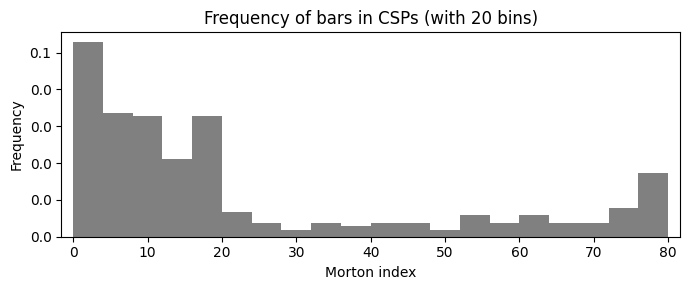

In [149]:
plt.figure(figsize=figsize)
plt.hist(allmortonindices, density=True, color="gray", bins=nbins)
plt.ylabel("Frequency")
plt.gca().yaxis.set_major_formatter(decforyaxis)
plt.xlabel("Morton index")
plt.xlim(mortonindexmin-margins, mortonindexmax+margins)
plt.title("Frequency of bars in CSPs (with "+str(nbins)+" bins)")
plt.tight_layout()
plt.savefig("results/generic_csps/2barfreq_nbins"+str(nbins)+".png")
plt.show()
plt.close()

Draw the generated G-CSP based on the frequency (the amount of bars in each of the bins):

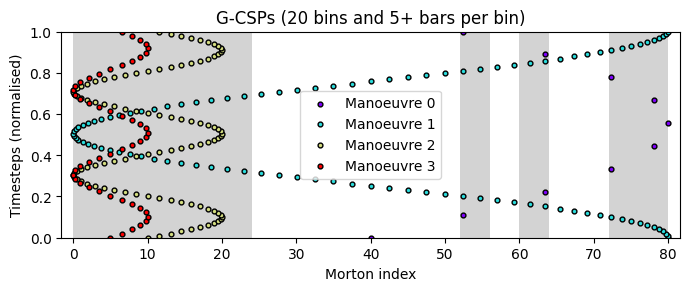

In [150]:
plt.figure(figsize=figsize)
plt.bar([totalrange/nbins/2+mortonindexmin+totalrange/(nbins)*x for x in range(nbins)], [1 if b > barthreshold else 0 for b in bincounter], width=totalrange/nbins, color="lightgray")
for i, csp in enumerate(listofcsps):
    ranges = [x / (len(csp) - 1) for x in range(len(csp))]
    plt.scatter(csp, ranges, color=colors[i], edgecolor="k", s=12, label="Manoeuvre "+str(i))
plt.ylabel("Timesteps (normalised)")
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(decforyaxis)
plt.xlabel("Morton index")
plt.xlim(mortonindexmin-margins, mortonindexmax+margins)
plt.legend()
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.title("G-CSPs ("+str(nbins)+" bins and " + str(barthreshold)+"+ bars per bin)")
plt.savefig("results/generic_csps/3gcsps_nbins"+str(nbins)+".png")
plt.show()
plt.close()